In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import holidays

In [2]:
from google.colab import files
uploaded=files.upload()

Saving dataset_train_040925.csv to dataset_train_040925.csv


In [3]:
#load
df_train = pd.read_csv('dataset_train_040925.csv', index_col="DateCET/CEST")

In [4]:
df_train = df_train.rename(columns={"pv[MWh]":"pv_energy_generation[MWh]", "Wind[Mwh]":"wind_energy_generation[MWh]", "diffuse_radiation_instant[W/m?]":"diffuse_radiation_instant[W/m2]"})

In [5]:
df_train.columns

Index(['Unnamed: 0', 'load_energy[MW]', 'price_energy[EUR/MWh]',
       'pv_energy_generation[MWh]', 'wind_energy_generation[MWh]',
       'price_gas[EUR/m3]', 'price_carbon_permits[EUR]', 'price_coal[EUR]',
       'temperature_2m[°C]', 'rain[mm]', 'wind_speed_100m[km/h]',
       'diffuse_radiation_instant[W/m2]'],
      dtype='object')

##Distribution of data

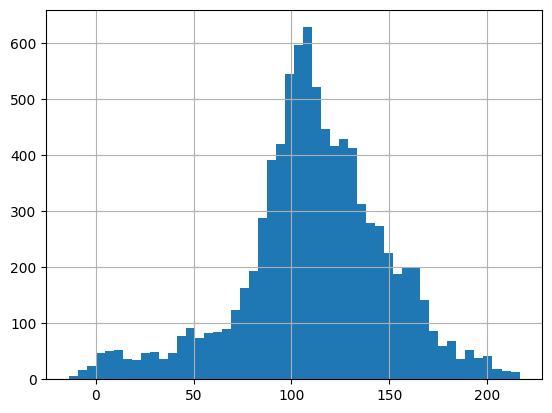

In [6]:
#histogram for data distribution
df_train['price_energy[EUR/MWh]'].hist(bins=50)
plt.show()

##Time Plot

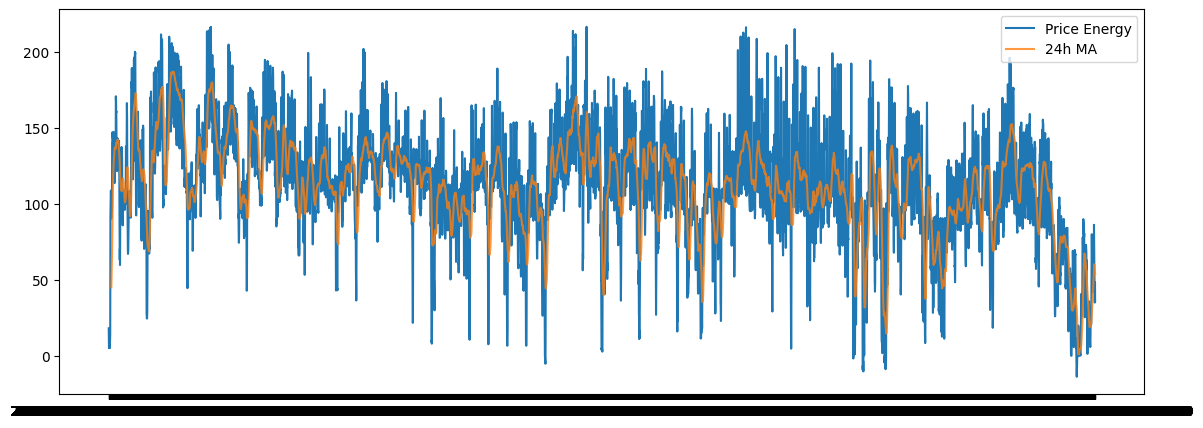

In [7]:
plt.figure(figsize=(14,5))
plt.plot(df_train['price_energy[EUR/MWh]'], label="Price Energy")
plt.plot(df_train['price_energy[EUR/MWh]'].rolling(24).mean(), label="24h MA", alpha=0.8)
plt.legend()
plt.show()

##Seasonal Plots

In [ ]:
def convert_data_to_datatime(df):
  #convert date to datetime
  df['DateCET/CEST']=pd.to_datetime(df['DateCET/CEST'])
  #extract month
  df['Month']=df['DateCET/CEST'].dt.month
  #extract day
  df['Day']=df['DateCET/CEST'].dt.day
  #extract hour
  df['Hour']=df['DateCET/CEST'].dt.hour
  #extract week
  df['Week']=df['DateCET/CEST'].dt.isocalendar().week
  return df

In [ ]:
df_train = convert_data_to_datatime(df_train)
#df_test = convert_data_to_datatime(df_test)

In [ ]:
def get_monthly_plot(df, column_name, title, x_label, y_label, value):
  #aggregate value monthly
  monthly = df.groupby('Month')[value].sum().reset_index()

  #plot
  plt.figure(figsize=(12,6))
  sns.relplot(x=monthly["Month"].astype(str),
            y=value,
            data=monthly,
            marker="o",
            kind="line")
  plt.xticks(rotation=90)
  plt.grid(True)
  plt.title(title, fontsize=16)
  plt.xlabel(x_label)
  plt.ylabel(y_label)

  plt.show()


<Figure size 1200x600 with 0 Axes>

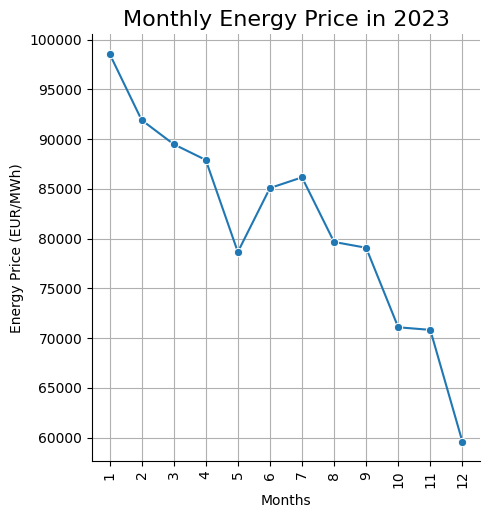

In [ ]:
#energy price
get_monthly_plot(
    df=df_train,
    column_name="price[EUR/MWh]",
    title="Monthly Energy Price in 2023",
    x_label="Months",
    y_label="Energy Price (EUR/MWh)",
    value="price[EUR/MWh]")

<Figure size 1200x600 with 0 Axes>

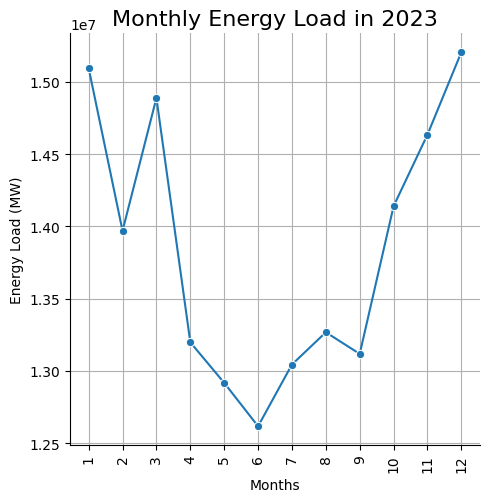

In [ ]:
#energy load
get_monthly_plot(
    df=df_train,
    column_name="load[MW]",
    title="Monthly Energy Load in 2023",
    x_label="Months",
    y_label="Energy Load (MW)",
    value="load[MW]")

In [ ]:
def get_hourly_monthly_plot_per_day(df, column_name, title, x_label, y_label, value):

  df['Month']=df['DateCET/CEST'].dt.to_period('M')

  weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  df['day_name'] = pd.Categorical(df['DateCET/CEST'].dt.day_name(),
                               categories=weekday_order,
                               ordered=True)
  #aggregate hourly per week
  hourly_per_week = df.groupby(['Month', 'day_name'])[value].mean().reset_index()

  #plot
  sns.lineplot(x="day_name",
               y=value,
               data = hourly_per_week,
               sort=False,
               hue="Month")

  plt.xticks(rotation=90)
  plt.grid(True)
  plt.title(title, fontsize=16)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()



/tmp/ipython-input-524669333.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_per_week = df.groupby(['Month', 'day_name'])[value].mean().reset_index()


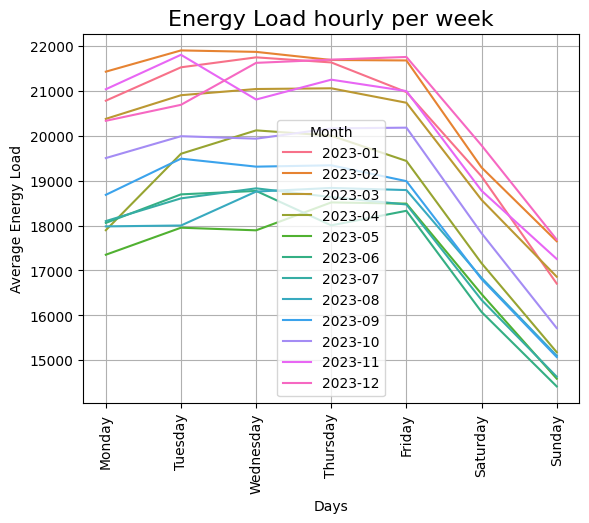

In [ ]:
#energy load
get_hourly_monthly_plot_per_day(df=df_train,
                        column_name="load[MW]",
                        title = "Energy Load hourly per week",
                        x_label = "Days",
                        y_label = "Average Energy Load",
                        value = "load[MW]")

/tmp/ipython-input-524669333.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_per_week = df.groupby(['Month', 'day_name'])[value].mean().reset_index()


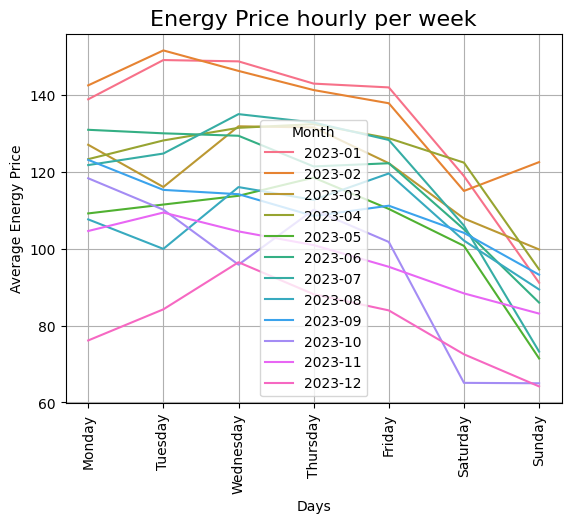

In [ ]:
#energy price
get_hourly_monthly_plot_per_day(df=df_train,
                        column_name="price[EUR/MWh]",
                        title = "Energy Price hourly per week",
                        x_label = "Days",
                        y_label = "Average Energy Price",
                        value = "price[EUR/MWh]")

In [ ]:
def get_hourly_plot_per_day(df, value, x_label, y_label, title):
  weekday_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  df['Day'] = pd.Categorical(df['DateCET/CEST'].dt.day_name(),
                               categories=weekday_order,
                               ordered=True)

  #aggregate hourly per day
  hourly_per_day = df.groupby(["Day", "Hour"])[value].mean().reset_index()

  #plot
  plt.figure(figsize=(12,6))
  sns.lineplot(
    data = hourly_per_day,
    hue = "Day",
    hue_order = weekday_order,\
    x="Hour",
    y=value,
    errorbar=None)

  plt.xticks(rotation=90)
  plt.grid(True)
  plt.title(title)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.show()


/tmp/ipython-input-3659057450.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_per_day = df.groupby(["Day", "Hour"])[value].mean().reset_index()


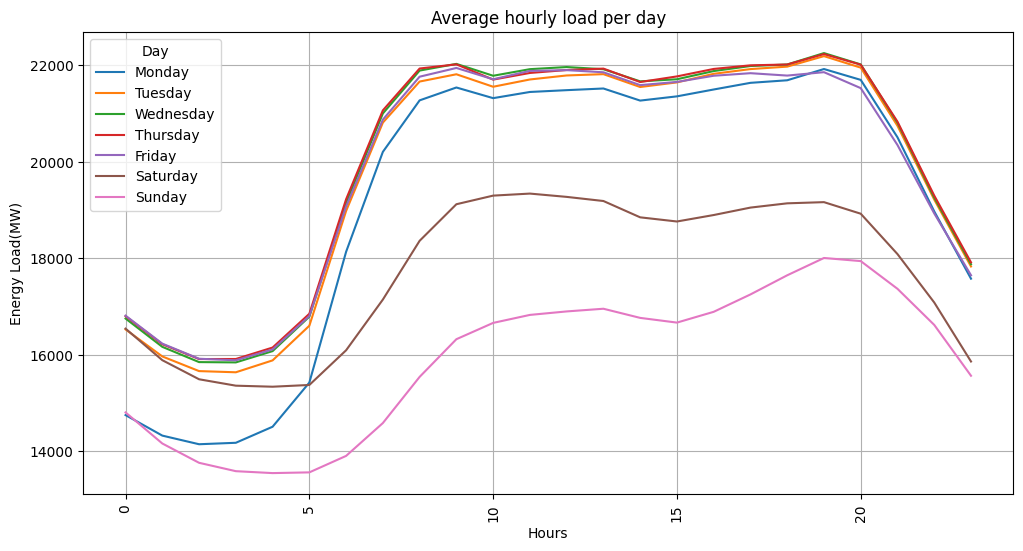

In [ ]:
#energy load
get_hourly_plot_per_day(df = df_train,
                        value = "load[MW]",
                        x_label = "Hours",
                        y_label = "Energy Load(MW)",
                        title = "Average hourly load per day")


/tmp/ipython-input-3659057450.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_per_day = df.groupby(["Day", "Hour"])[value].mean().reset_index()


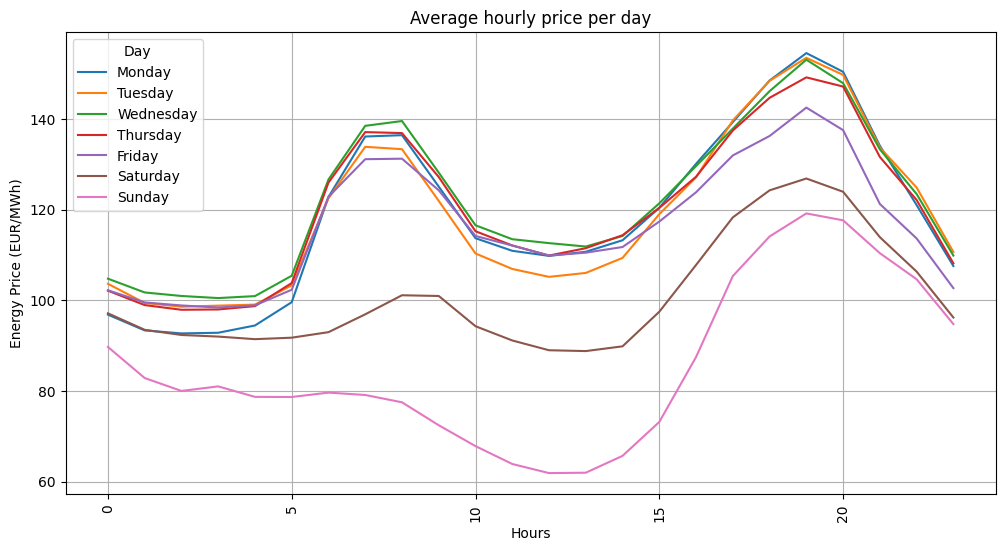

In [ ]:
#energy price
get_hourly_plot_per_day(df = df_train,
                        value = "price[EUR/MWh]",
                        x_label = "Hours",
                        y_label = "Energy Price (EUR/MWh)",
                        title = "Average hourly price per day")

##Correaltion Matrix

In [ ]:
df_train.columns

Index(['load_energy[MW]', 'price_energy[EUR/MWh]', 'pv_energy_generation[MWh]',
       'wind_energy_generation[MWh]', 'price_gas[EUR/m3]',
       'price_carbon_permits[EUR]', 'price_coal[EUR]', 'temperature_2m[°C]',
       'rain[mm]', 'wind_speed_100m[km/h]', 'diffuse_radiation_instant[W/m2]'],
      dtype='object')

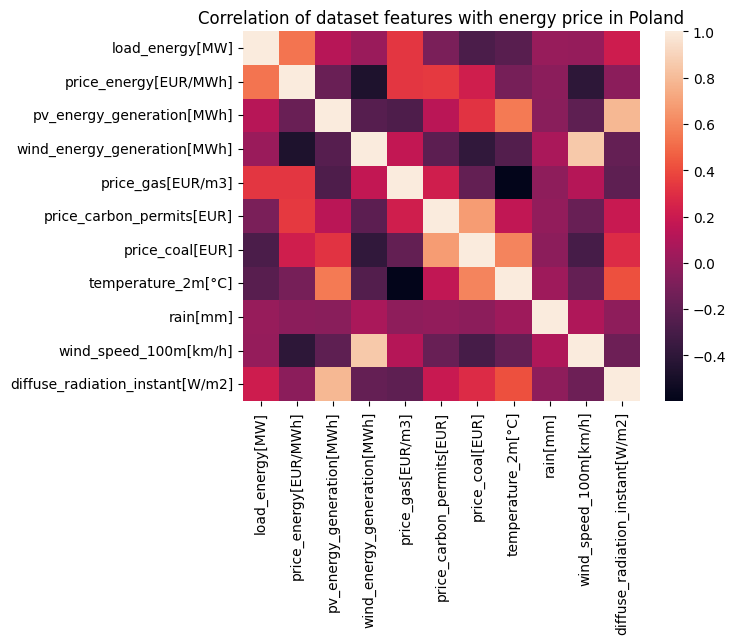

In [ ]:
ax = plt.axes()
sns.heatmap(df_train.corr(), ax=ax)
ax.set_title('Correlation of dataset features with energy price in Poland')
plt.show()